<a href="https://colab.research.google.com/github/ayobanjo/Smart-contract-project/blob/main/Frequency_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carrying out frequency and correlation analysis

In [2]:
from ast import increment_lineno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
## Importing dataset
df = pd.read_excel('compiled_risk_data cleaned.xlsx')

df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


**Calculating Frequencies**

This prints out the number of True values for each risk tag.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                966 non-null    object
 1   Smart contract address                      966 non-null    object
 2   Blog post link                              966 non-null    object
 3   Audit website                               966 non-null    object
 4   Chain                                       966 non-null    object
 5   Is_closed_source                            966 non-null    bool  
 6   hidden_owner                                966 non-null    bool  
 7   anti_whale_modifiable                       966 non-null    bool  
 8   Is_anti_whale                               966 non-null    bool  
 9   Is_honeypot                                 966 non-null    bool  
 10  buy_tax                   

In [4]:
risk_columns = ["Is_closed_source","hidden_owner","anti_whale_modifiable","Is_anti_whale","Is_honeypot","buy_tax","sell_tax","slippage_modifiable","Is_blacklisted","can_take_back_ownership","owner_change_balance",
                "is_airdrop_scam","selfdestruct","trust_list","is_whitelisted","is_fake_token","illegal_unicode","exploitation","bad_contract","reusing_state_variable","encode_packed_collision","encode_packed_parameters"
                ,"centralized_risk_medium","centralized_risk_high","centralized_risk_low","event_setter","external_dependencies","immutable_states","reentrancy_without_eth_transfer","incorrect_inheritance_order","shadowing_local"
                ,"events_maths"]


In [5]:

# Selecting only boolean columns
bool_columns = df.select_dtypes(include='bool')

# Apply value_counts only on boolean columns and count True values
frequencies = bool_columns.apply(lambda x: x.value_counts()).loc[True]

# Fill NaN with 0 for any missing counts
frequencies = frequencies.fillna(0)

# Display the frequencies
frequencies


,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


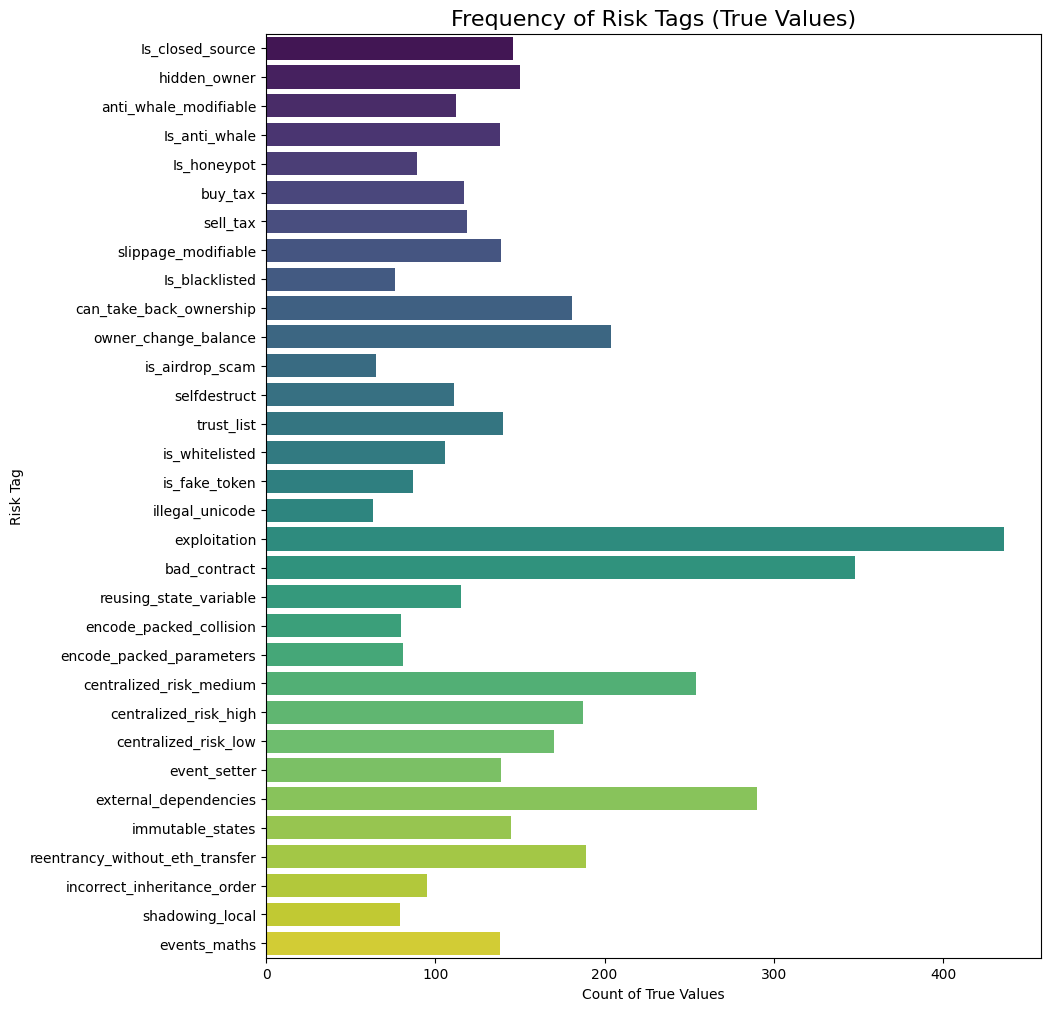

In [6]:
plt.figure(figsize=(10, 12))
sns.barplot(x=frequencies.values, y=frequencies.index, hue=frequencies.index, palette='viridis', dodge=False, legend=False)
plt.title('Frequency of Risk Tags (True Values)', fontsize=16)
plt.xlabel('Count of True Values', fontsize=10)
plt.ylabel('Risk Tag', fontsize=10)
plt.show()